In [1]:
from geo.model.geoCNN import GeoGuessrCNN

from geo.model.LossPrintingCallback import LossAndErrorPrintingCallback
from geo.data.utils import dataGen

from matplotlib import pyplot as plt

In [1]:
import os.path

directory = "data/geoguessr_filtered/"

filenames = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if (os.path.isdir(f)):
        i = 0
        for image in os.listdir(f):
            filenames.append(f"{f}/{image}")
            i += 1

In [81]:
fn1 = list(map(lambda x: "/".join(x.split("/")[2:]), filenames))
print(fn1)

['Curacao/canvas_1630120063.jpg', 'Jersey/canvas_1629737742.jpg', 'Poland/canvas_1629567517.jpg', 'Poland/canvas_1629683896.jpg', 'Poland/canvas_1629967114.jpg', 'Poland/canvas_1630039047.jpg', 'Poland/canvas_1630282889.jpg', 'Aland/canvas_1630052504.jpg', 'Albania/canvas_1629780994.jpg', 'American Samoa/canvas_1629271395.jpg', 'Andorra/canvas_1630067919.jpg', 'Antarctica/canvas_1629620842.jpg', 'Argentina/canvas_1629545914.jpg', 'Argentina/canvas_1629849027.jpg', 'Argentina/canvas_1630122915.jpg', 'Argentina/canvas_1630216469.jpg', 'Armenia/canvas_1629782851.jpg', 'Australia/canvas_1629408293.jpg', 'Australia/canvas_1629502200.jpg', 'Australia/canvas_1629765924.jpg', 'Australia/canvas_1629825868.jpg', 'Australia/canvas_1629835034.jpg', 'Australia/canvas_1629913595.jpg', 'Australia/canvas_1629928836.jpg', 'Australia/canvas_1629932639.jpg', 'Australia/canvas_1629939725.jpg', 'Austria/canvas_1630046566.jpg', 'Austria/canvas_1630135427.jpg', 'Bangladesh/canvas_1630107607.jpg', 'Belarus/ca

In [3]:
classes = list(set(map(lambda x: x.split("/")[2], filenames)))
numclasses = len(classes)
print(numclasses)
classes = dict(zip(classes, range(numclasses)))
classes

124


{'Germany': 0,
 'Gibraltar': 1,
 'Antarctica': 2,
 'Armenia': 3,
 'Luxembourg': 4,
 'Vietnam': 5,
 'South Georgia and South Sandwich Islands': 6,
 'Paraguay': 7,
 'Japan': 8,
 'Lesotho': 9,
 'Iceland': 10,
 'Hong Kong': 11,
 'Ireland': 12,
 'Spain': 13,
 'Botswana': 14,
 'Ghana': 15,
 'Lithuania': 16,
 'Brazil': 17,
 'Philippines': 18,
 'India': 19,
 'Greece': 20,
 'New Zealand': 21,
 'Denmark': 22,
 'Guam': 23,
 'Laos': 24,
 'Kyrgyzstan': 25,
 'Aland': 26,
 'Madagascar': 27,
 'Colombia': 28,
 'France': 29,
 'Montenegro': 30,
 'Croatia': 31,
 'San Marino': 32,
 'Hungary': 33,
 'Nigeria': 34,
 'Latvia': 35,
 'Lebanon': 36,
 'Indonesia': 37,
 'Malta': 38,
 'Pakistan': 39,
 'Puerto Rico': 40,
 'Uganda': 41,
 'Netherlands': 42,
 'Egypt': 43,
 'South Sudan': 44,
 'Italy': 45,
 'Isle of Man': 46,
 'Czechia': 47,
 'Qatar': 48,
 'Switzerland': 49,
 'Estonia': 50,
 'Bolivia': 51,
 'Eswatini': 52,
 'Guatemala': 53,
 'American Samoa': 54,
 'Bhutan': 55,
 'United Kingdom': 56,
 'Australia': 57,
 '

In [84]:
it = dataGen(fn1, directory)

In [85]:
X, y = next(it)

In [86]:
outputShape = y.shape
outputShape

(10, 124)

In [87]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
inputShape = X.shape
inputShape = (1, *inputShape[1:])
inputShape

(1, 662, 1536, 3)

In [89]:
X

array([[[[119, 135, 160],
         [119, 135, 160],
         [119, 135, 160],
         ...,
         [203, 204, 208],
         [203, 204, 208],
         [203, 204, 208]],

        [[119, 135, 160],
         [119, 135, 160],
         [119, 135, 160],
         ...,
         [203, 204, 208],
         [203, 204, 208],
         [203, 204, 208]],

        [[119, 135, 160],
         [119, 135, 160],
         [119, 135, 160],
         ...,
         [203, 204, 208],
         [203, 204, 208],
         [203, 204, 208]],

        ...,

        [[117, 114, 109],
         [118, 115, 110],
         [120, 117, 112],
         ...,
         [ 55,  51,  48],
         [ 55,  51,  48],
         [ 55,  51,  48]],

        [[123, 120, 115],
         [124, 121, 116],
         [125, 122, 117],
         ...,
         [ 54,  50,  47],
         [ 54,  50,  47],
         [ 54,  50,  47]],

        [[128, 125, 120],
         [128, 125, 120],
         [128, 125, 120],
         ...,
         [102,  98,  95],
        

In [90]:
model = GeoGuessrCNN(inputShape=inputShape, outputShape=outputShape[1])

In [92]:
total_loss = 0

In [93]:
epochs = 5

print("Getting data from directory: {}".format(directory))
accuracy = []
loss = []
saveFolder = "models-20"
cnt = 0
for X, y in dataGen(fn1, directory, batchSize=11, infinite=False):
    callBack = [LossAndErrorPrintingCallback(saveFolder, cnt)]
    print("Read {} points. Training now".format(len(X)))
    evalutaion = model.fit(X, y,
                           epochs=epochs, steps_per_epoch=len(X),
                           callbacks=callBack)
    accuracy += evalutaion.history['categorical_accuracy']
    loss += evalutaion.history['loss']
    cnt += 1


Getting data from directory: data/geoguessr_filtered/
Read 11 points. Training now
Epoch 1/5


2022-06-19 14:00:34.246451: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 520617984 exceeds 10% of free system memory.
2022-06-19 14:00:34.389944: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 520617984 exceeds 10% of free system memory.
2022-06-19 14:00:35.352519: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 520617984 exceeds 10% of free system memory.
2022-06-19 14:00:36.457020: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 290193408 exceeds 10% of free system memory.
2022-06-19 14:00:36.457820: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 290193408 exceeds 10% of free system memory.


11/11 [==============================] - 80s 7s/step - loss: 50.2087 - categorical_accuracy: 0.0909
Epoch 2/5
11/11 [==============================] - 80s 7s/step - loss: 27.7244 - categorical_accuracy: 0.0000e+00
Epoch 3/5
11/11 [==============================] - 76s 7s/step - loss: 19.8771 - categorical_accuracy: 0.1818
Epoch 4/5
11/11 [==============================] - 75s 7s/step - loss: 11.3130 - categorical_accuracy: 0.3636
Epoch 5/5
11/11 [==============================] - 77s 7s/step - loss: 6.9464 - categorical_accuracy: 0.1818
Training sucessfull!!

Saving model 0 with loss 0 at models
Read 11 points. Training now
Epoch 1/5
11/11 [==============================] - 69s 6s/step - loss: 12.7408 - categorical_accuracy: 0.0000e+00
Epoch 2/5
11/11 [==============================] - 70s 6s/step - loss: 7.2260 - categorical_accuracy: 0.0000e+00
Epoch 3/5
11/11 [==============================] - 66s 6s/step - loss: 5.0239 - categorical_accuracy: 0.0000e+00
Epoch 4/5
11/11 [===========

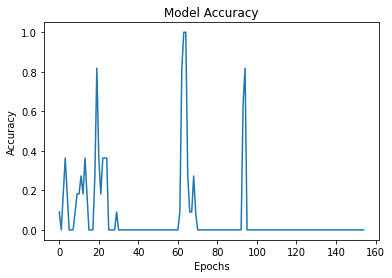

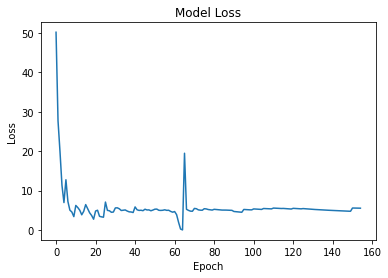

In [94]:
plt.plot(accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

plt.plot(loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()